In [1]:
import pandas as pd
import numpy as np
from numpy.random import rand, randint
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats

%matplotlib inline

#Données NBA : nombre de points marqués par les 9 meilleurs joueurs 2012

In [2]:
names_data = ['Carmelo<br>Anthony', 'Dwyane<br>Wade',
          'Deron<br>Williams', 'Brook<br>Lopez',
          'Damian<br>Lillard', 'David<br>West',
          'Blake<br>Griffin', 'David<br>Lee',
          'Demar<br>Derozan']

def g(name):
    return name.split('<br>')[1]

names_data = [g(ele) for ele in names_data]
    

scores_data = [
    ['30', '27', '21', '31', '25', '9', '20', '26', '29', '23', '37', '29','35', '29', '20', '34', '23', '34', '45', '30', '31', '29', '33', '34', '45', '23', '40', '20', '39', '27', '26', '29', '28', '25', '42', '20', '25', '9', '27', '31', '36', '42', '12', '15', '32', '29', '35', '30', '32', '6', '14', '9', '21', '37', '28', '29', '22', '32', '24', '50', '40', '41', '36', '36', '36', '31', '25', '36', '34', '26', '36', '22', '21', '27', '32', '21', '24', '28', '39'],
    ['29', '15', '14', '22', '22', '8', '19', '6', '28', '18', '19', '34', '24', '13', '26', '26', '14', '13', '24', '19', '21', '21', '29', '24', '21', '27', '22', '14', '30', '18', '11', '11', '15', '27', '35', '29', '17', '21', '17', '23', '20', '31', '20', '30', '24', '13', '20', '17', '33', '24', '39', '22', '20', '32', '24', '22', '23', '23', '21', '20', '24', '16', '11', '19', '18', '17', '11', '22', '21', '16', '21', '4', '14', '15', '10', '6', '18', '19', '14', '18', '16', '10', '10', '21', '17', '10', '16', '32', '25', '14', '23'],
    ['19', '18', '14', '12', '17', '26', '24', '14', '22', '9', '11', '15', '16', '8', '11', '10', '33', '23', '18', '18', '12', '17', '24', '14', '16', '16', '10', '19', '15', '8', '19', '24', '15', '22', '15', '22', '21', '12', '24', '14', '18', '12', '27', '20', '9', '11', '15', '12', '20', '15', '19', '23', '15', '24', '33', '24', '14', '20', '42', '17', '27', '21', '18', '31', '31', '18', '20', '6', '19', '21', '24', '30', '32', '11', '29', '33', '30', '8', '22', '8', '18', '32', '23', '17', '24'],
    ['27', '13', '8', '14', '20', '23', '24', '13', '23', '22', '26', '15', '22', '9', '9', '18', '16', '16', '14', '15', '21', '26', '35', '11', '25', '27', '18', '13', '13', '15', '22', '22', '20', '14', '22', '18', '21', '16', '21', '20', '30', '17', '13', '18', '25', '23', '19', '9', '27', '9', '20', '19', '22', '16', '11', '18', '19', '26', '17', '18', '38', '18', '21', '28', '11', '27', '14', '28', '19', '29', '21', '24', '16', '20', '21', '21', '22', '26', '28', '17', '21'],
    ['23', '21', '20', '13', '16', '20', '12', '22', '27', '16', '24', '28', '13', '12', '20', '8', '24', '24', '23', '12', '9', '29', '16', '12', '25', '15', '17', '11', '20', '21', '18', '11', '20', '18', '10', '37', '9', '16', '13', '26', '18', '20', '20', '16', '10', '26', '23', '21', '19', '18', '4', '33', '12', '24', '19', '12', '26', '24', '20', '20', '35', '20', '27', '26', '14', '27', '8', '24', '22', '19', '15', '24', '16', '17', '17', '11', '15', '38', '10', '30', '12', '21'],
    ['25', '14', '18', '10', '20', '19', '11', '11', '7', '15', '14', '30', '16', '22', '16', '31', '23', '10', '16', '18', '21', '18', '14', '23', '12', '13', '15', '25', '14', '29', '13', '8', '10', '10', '14', '6', '14', '27', '15', '14', '20', '14', '21', '24', '17', '14', '30', '29', '15', '15', '30', '7', '18', '18', '16', '28', '22', '15', '31', '11', '9', '24', '13', '8', '18', '7', '14', '16', '17', '12', '15', '26', '17', '13', '7', '18', '15', '24', '21', '20', '13', '11', '10', '17', '17', '26', '13', '21', '14', '17', '11', '14'],
    ['11', '15', '19', '20', '22', '7', '16', '20', '26', '16', '23', '14', '22', '4', '18', '14', '30', '19', '24', '19', '22', '19', '18', '15', '18', '21', '23', '13', '15', '22', '7', '12', '10', '24', '20', '15', '30', '10', '19', '20', '17', '26', '31', '12', '24', '23', '26', '17', '20', '13', '17', '20', '20', '22', '17', '18', '24', '18', '16', '20', '23', '17', '22', '22', '12', '26', '7', '11', '14', '19', '18', '12', '17', '9', '24', '19', '20', '12', '16', '7', '10', '21', '16', '19', '4', '9'],
    ['6', '16', '8', '20', '22', '10', '18', '18', '18', '19', '17', '20', '21', '17', '31', '13', '22', '20', '30', '24', '25', '22', '24', '20', '26', '29', '23', '20', '18', '25', '20', '24', '10', '14', '24', '23', '12', '22', '12', '22', '23', '12', '21', '20', '15', '16', '18', '12', '26', '10', '12', '18', '19', '25', '22', '12', '10', '13', '29', '17', '16', '21', '20', '15', '10', '20', '10', '11', '23', '20', '13', '23', '22', '21', '15', '13', '19', '12', '20', '10', '0', '5', '0', '6', '9'],
    ['10', '25', '22', '8', '24', '19', '37', '15', '10', '20', '24', '14', '5', '29', '12', '16', '23', '18', '14', '17', '24', '20', '11', '14', '19', '16', '23', '17', '8', '30', '21', '24', '14', '11', '19', '6', '23', '12', '18', '8', '8', '12', '22', '15', '21', '23', '19', '27', '13', '22', '7', '22', '20', '24', '7', '18', '25', '34', '9', '18', '15', '15', '28', '13', '17', '9', '12', '19', '18', '17', '14', '21', '15', '15', '25', '25', '12', '20', '19', '36', '30', '24']
]

def f(list0):
    list1 = [float(x) for x in list0]
    return list1

scores_data = [f(ele) for ele in scores_data]

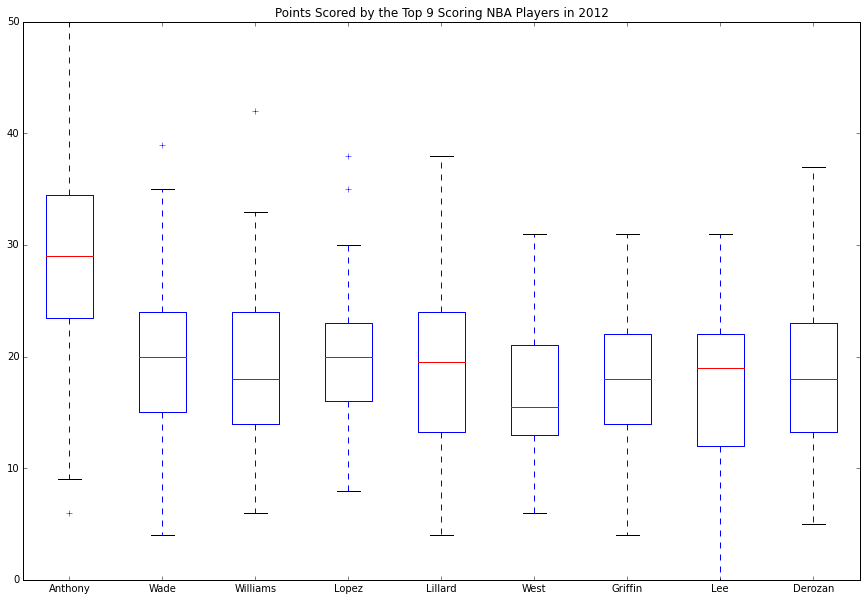

In [3]:
fig, axes = plt.subplots(1,1, figsize = (15,10))
axes.boxplot(scores_data, labels = names_data, whis=1.5) #whis = 1.5 determines the reach of the whiskers past the first and third quartiles (e.g., Q3 + whis*IQR, IQR = interquartile range, Q3-Q1)
axes.set_title('Points Scored by the Top 9 Scoring NBA Players in 2012')

# qqplot

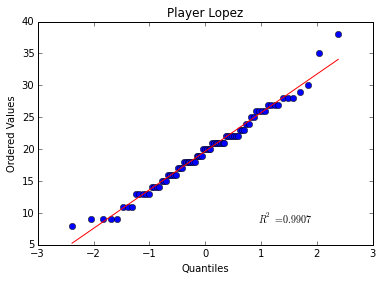

In [4]:
#measurements = np.random.normal(loc = 20, scale = 5, size=100) #normal data
#measurements = np.random.uniform(0,1, size=100) # uniform data
#measurements = np.random.gamma(shape = 2, scale = 1, size=100) # gamma data
nb_player=3
measurements, text_title  =  scores_data[nb_player], 'Player ' + names_data[nb_player]  
stats.probplot(measurements, dist="norm", plot=plt) # compare with the theoretical Gaussian quantile
plt.title(text_title)
plt.show()